In [1]:
# import the library
import os
import cv2
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/p8h7ckeo2dn1jtz/opencv_bootcamp_assets_NB6.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB6.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

In [4]:
source = './race_car.mp4'   # source = 0 for webcam

cap = cv2.VideoCapture(source)

In [5]:
if (cap.isOpened == False):
    print('Error opening video stream or file')

### Read and display one frame

In [6]:
ret, frame = cap.read()

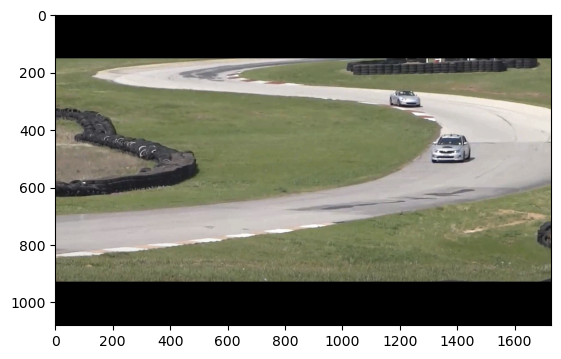

In [7]:
# displaying first frame
plt.imshow(frame[...,::-1])

### Display video from file

In [9]:
from IPython.display import HTML

HTML("""
    <video width=1024 controls>
        <source src='./race_car.mp4' type='video/mp4' >
     </video>
""")

## Video Writing using OpenCV

In [11]:
# obtaining default resolution
# converting float to int
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# define codec and create video write object
out_avi = cv2.VideoWriter('race_car_out.avi', cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 10, (frame_width,frame_height))
out_mp4 = cv2.VideoWriter('race_car_out.mp4', cv2.VideoWriter_fourcc(*'XVID'), 10, (frame_width,frame_height))

### Read frames and write to file

In [12]:
# read until video is complete
while(cap.isOpened()):
    # capture frame by frame
    ret, frame = cap.read()

    if ret == True:

        # write frame to output file
        out_avi.write(frame)
        out_mp4.write(frame)

    else:
        break

In [13]:
# when everything complete, release video capture and video writer objects
cap.release()
out_avi.release()
out_mp4.release()